In [3]:
from components.cnn_parallell import experiment1, experiment2
import numpy as np
import mnist
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
SUBSET_SIZE = 60000

imgs = mnist.train_images()/255.0
labels = mnist.train_labels()
dataset = imgs[0:SUBSET_SIZE, 1:, 1:]
labels = labels[0:SUBSET_SIZE]
subset_flattened = dataset.reshape(SUBSET_SIZE, 27*27)

X_train, X_test, y_train, y_test = train_test_split(subset_flattened, 
                                                    labels,
                                                    test_size=0.25,
                                                    random_state=0)

def trainer_baseline():
    clf = LogisticRegression(fit_intercept=True,
                             multi_class='auto',
                             penalty='l1',
                             solver='saga',
                             max_iter=1000,
                             C=50,
                             verbose=2,
                             n_jobs=8,
                             tol=0.01
                            )
    clf.fit(subset_flattened, labels)
    return clf

In [7]:
pred = trainer_baseline()

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.23583290
Epoch 3, change: 0.15830423
Epoch 4, change: 0.10225382
Epoch 5, change: 0.08255320
Epoch 6, change: 0.07197737
Epoch 7, change: 0.05635902
Epoch 8, change: 0.04421260
Epoch 9, change: 0.04023835
Epoch 10, change: 0.03703075
Epoch 11, change: 0.03429838
Epoch 12, change: 0.03143089
Epoch 13, change: 0.02959727
Epoch 14, change: 0.02795005
Epoch 15, change: 0.02695682
Epoch 16, change: 0.02577066
Epoch 17, change: 0.02417451
Epoch 18, change: 0.02350044
Epoch 19, change: 0.02275873
Epoch 20, change: 0.02159758
Epoch 21, change: 0.02056220
Epoch 22, change: 0.02028398
Epoch 23, change: 0.01933053
Epoch 24, change: 0.01870766
Epoch 25, change: 0.01817581
Epoch 26, change: 0.01768270
Epoch 27, change: 0.01720627
Epoch 28, change: 0.01673218
Epoch 29, change: 0.01581974
Epoch 30, change: 0.01559967
Epoch 31, change: 0.01516066
Epoch 32, change: 0.01493576
Epoch 33, change: 0.01456342
Epoch 34, change: 0.01418460
Epoch 35, change: 0.013

In [8]:
print(pred.classes_)
print(pred.coef_.shape)

[0 1 2 3 4 5 6 7 8 9]
(10, 729)


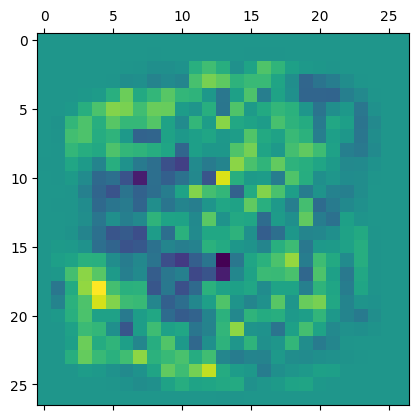

In [14]:
plt.matshow(pred.coef_[3].reshape((27, 27)))

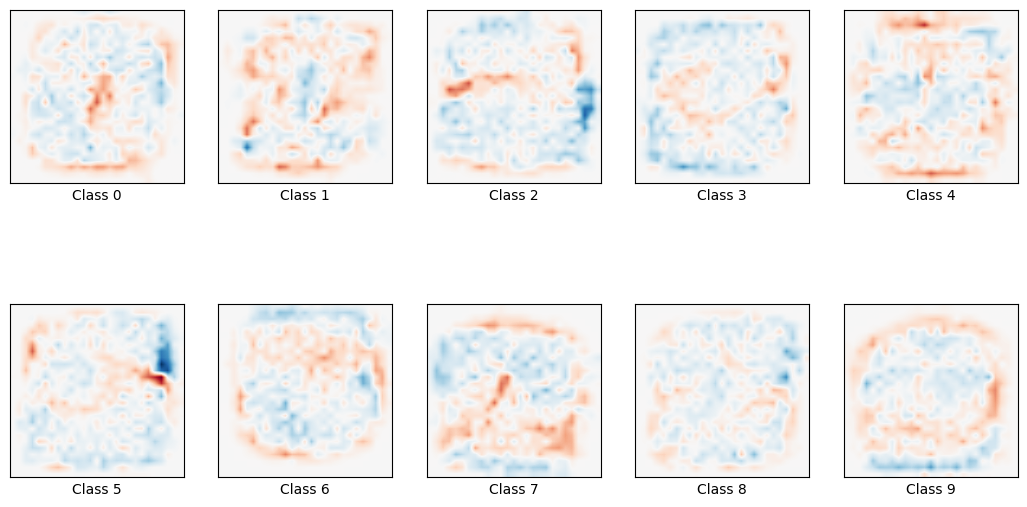

In [10]:
coef = pred.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(13,7))

for i in range(10):
    cfs = plt.subplot(2, 5, i + 1)
    cfs.matshow(coef[i].reshape(27, 27), 
                cmap=plt.cm.RdBu,
                vmin=-scale, vmax=scale,
                interpolation='bilinear')
    
    cfs.set_xticks(())
    cfs.set_yticks(())
    cfs.set_xlabel(f'Class {i}')

#plt.suptitle('Coefficients for various classes')